In [102]:
path="/content/train.csv"
test="/content/test.csv"
sub="/content/gender_submission.csv"

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
df=pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df=df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)
df['Age']=df['Age'].fillna(df['Age'].mean()).astype(int)


In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [8]:
cols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [9]:
print(df['Age'].max())
# print(df[df['Age'] < 25].value_counts())
print(df[df['Survived'] ==1]['Age'].value_counts())
print(df[df['Survived'] ==0]['Age'].value_counts())

80
Age
29    60
24    15
35    11
27    11
22    11
36    11
30    10
32    10
18     9
19     9
31     8
28     7
0      7
4      7
16     6
17     6
34     6
40     6
33     6
26     6
25     6
42     6
48     6
1      5
23     5
38     5
21     5
3      5
39     5
45     5
50     5
49     4
15     4
5      4
58     3
14     3
54     3
52     3
2      3
44     3
20     3
60     2
6      2
9      2
51     2
13     2
41     2
63     2
8      2
62     2
56     2
55     1
12     1
37     1
53     1
7      1
80     1
43     1
11     1
47     1
Name: count, dtype: int64
Age
29    137
28     20
21     19
18     17
25     17
     ... 
66      1
3       1
15      1
6       1
74      1
Name: count, Length: 64, dtype: int64


In [10]:
# As Age increase chance of both survived or not become less

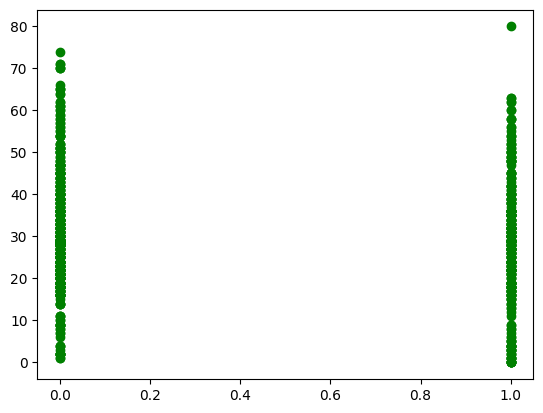

In [11]:
plt.scatter(df['Survived'],df['Age'],color='g')
plt.show()

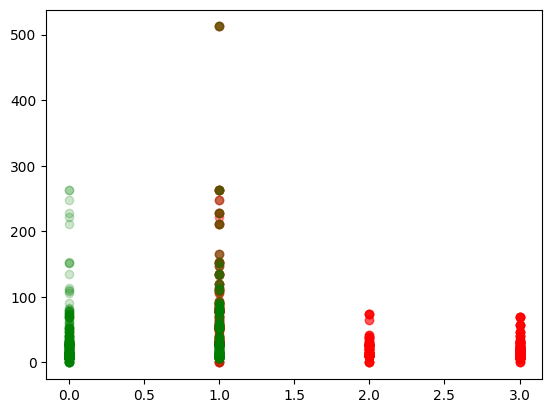

In [78]:
plt.scatter(df['Pclass'],df['Fare'],color='r',alpha=0.4)
plt.scatter(df['Survived'],df['Fare'],color='g',alpha=0.2)
plt.show()

In [81]:
# Highest Fare give more chance of Survived
print(df[df['Survived']==1]['Fare'].max())
df[df['Survived']==0]['Fare'].max()

512.3292


263.0

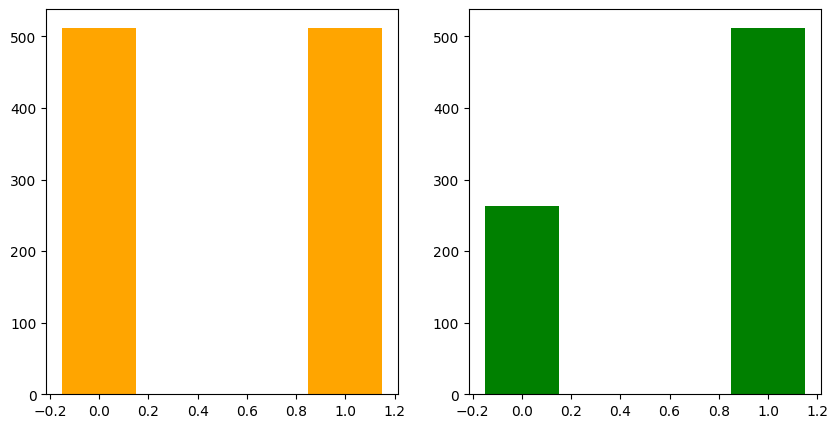

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(df['Sex'],df['Fare'],width=0.3,color='orange')
ax[1].bar(df['Survived'],df['Fare'],width=0.3,color='green')
plt.show()

In [12]:
print(df[df['Sex'] == 'male']['Survived'].value_counts())
print(df[df['Sex'] == 'female']['Survived'].value_counts())

Survived
0    468
1    109
Name: count, dtype: int64
Survived
1    233
0     81
Name: count, dtype: int64


In [13]:
# Female has high chance of survival

In [14]:
print(df['Embarked'].unique())
print(df['Sex'].unique())

['S' 'C' 'Q' nan]
['male' 'female']


In [15]:
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])

In [103]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.544332,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [64]:
print(df['Age'].min())
print(df['Age'].max())
df['Age'].median()

0
80


29.0

In [91]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [92]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.20)

## DecisionTreeClassifier

In [93]:
dt=DecisionTreeClassifier(class_weight='balanced')
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [94]:
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.7821229050279329

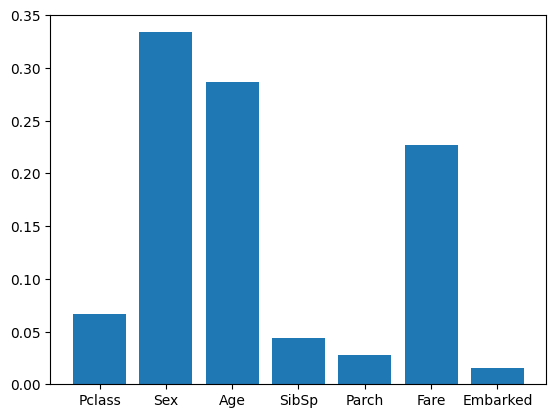

In [95]:
imp=dt.feature_importances_
plt.bar(x=X.columns,height=imp)
plt.show()

## Random Forest Classifier

In [97]:
rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [98]:
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8268156424581006

In [99]:
metrics=classification_report(y_test,y_pred)
print(metrics)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       102
           1       0.81      0.78      0.79        77

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## Test Data-Set

In [104]:
df_test=pd.read_csv(test)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
submission=pd.DataFrame(df_test['PassengerId'],columns=['PassengerId'])

In [106]:
X_test=df_test.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)

In [111]:
X_test['Age']=X_test['Age'].fillna(X_test['Age'].mean()).astype(int)
X_test['Fare']=X_test['Fare'].fillna(X_test['Fare'].mean()).astype(int)

In [113]:
X_test['Sex']=le.fit_transform(X_test['Sex'])
X_test['Embarked']=le.fit_transform(X_test['Embarked'])

In [116]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7,1
1,3,0,47,1,0,7,2
2,2,1,62,0,0,9,1
3,3,1,27,0,0,8,2
4,3,0,22,1,1,12,2


In [121]:
submission['Survived']=rf.predict(X_test)

In [125]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [126]:
submission.to_csv('Submission.csv',index=False)